In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

Group by

In [54]:
Youbike_rent = pd.read_csv('./202302_YouBike2.0_rent_1000.csv', encoding = "Big5") 

In [55]:
Youbike_groupby = Youbike_rent.groupby(['rent_station']).size()
Youbike_groupby

rent_station
世貿三館          9
中華南海路口        1
五分埔公園         5
信義基隆路口        5
信義松德路口        3
             ..
開封西寧路口       14
雙園國中          2
青年公園棒球場       1
青年公園籃球場       2
青年公園高爾夫球場     1
Length: 106, dtype: int64

Spatial Join

In [67]:
## geocoding
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-exercise")

def geocoder(row):
    try:
        point = geolocator.geocode(row, country_codes = "TW").point
        return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})
    except:
        return None

In [68]:
Youbike_rent[['Latitude', 'Longitude']] = Youbike_rent.apply(lambda x: geocoder(x['rent_station']), axis=1)

In [69]:
Youbike_rent.head()

,rent_time,rent_station,return_time,return_station,rent,infodate,Latitude,Longitude
0,2023/2/11 12:00,捷運民權西路站(3號出口),2023/2/11 13:00,捷運民權西路站(3號出口),01:02:23,2023/2/11,25.06129,121.52021
1,2023/2/11 22:00,景美醫院,2023/2/11 23:00,新生和平路口東北側,00:37:03,2023/2/11,24.99136,121.54008
2,2023/2/11 03:00,基隆忠孝路口西南側,2023/2/11 03:00,中全公園,00:08:42,2023/2/11,25.04108,121.56290
3,2023/2/11 11:00,基隆忠孝路口西南側,2023/2/11 11:00,基隆忠孝路口西南側,00:15:54,2023/2/11,25.04108,121.56290
4,2023/2/11 11:00,基隆忠孝路口西南側,2023/2/11 11:00,復興市民路口,00:15:08,2023/2/11,25.04108,121.56290


In [70]:
Youbike_rent.to_csv("./Youbike_withCoord.csv", encoding = "Big5" )

In [72]:
# set coord. to geometry format and set CRS
Youbike_rent = Youbike_rent.loc[~np.isnan(Youbike_rent["Latitude"])]
Youbike_rent = gpd.GeoDataFrame(
    Youbike_rent, geometry=gpd.points_from_xy(Youbike_rent.Longitude, Youbike_rent.Latitude))
Youbike_rent.crs = "EPSG:4326"    
Youbike_rent = Youbike_rent.to_crs(epsg=4326)
Youbike_rent.head()

,rent_time,rent_station,return_time,return_station,rent,infodate,Latitude,Longitude,geometry
0,2023/2/11 12:00,捷運民權西路站(3號出口),2023/2/11 13:00,捷運民權西路站(3號出口),01:02:23,2023/2/11,25.06129,121.52021,POINT (121.52021 25.06129)
1,2023/2/11 22:00,景美醫院,2023/2/11 23:00,新生和平路口東北側,00:37:03,2023/2/11,24.99136,121.54008,POINT (121.54008 24.99136)
2,2023/2/11 03:00,基隆忠孝路口西南側,2023/2/11 03:00,中全公園,00:08:42,2023/2/11,25.04108,121.56290,POINT (121.56290 25.04108)
3,2023/2/11 11:00,基隆忠孝路口西南側,2023/2/11 11:00,基隆忠孝路口西南側,00:15:54,2023/2/11,25.04108,121.56290,POINT (121.56290 25.04108)
4,2023/2/11 11:00,基隆忠孝路口西南側,2023/2/11 11:00,復興市民路口,00:15:08,2023/2/11,25.04108,121.56290,POINT (121.56290 25.04108)


<Axes: >

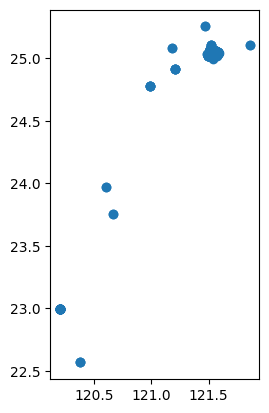

In [73]:
Youbike_rent.plot()

In [74]:
# read Taipei map
Big_Taipei_data = gpd.read_file('./Town/Taipei.shp', encoding='utf-8')
Big_Taipei_data.head()
Big_Taipei_data = Big_Taipei_data.to_crs(epsg=4326)

In [75]:
Big_Taipei_data.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,A02,63000030,臺北市,大安區,Da'an District,A,63000,"POLYGON ((121.54385 25.04490, 121.54408 25.044..."
1,A11,63000080,臺北市,文山區,Wenshan District,A,63000,"POLYGON ((121.59726 25.01438, 121.59725 25.014..."
2,F33,65000040,新北市,永和區,Yonghe District,F,65000,"POLYGON ((121.51240 25.02174, 121.51256 25.021..."
3,F07,65000060,新北市,新店區,Xindian District,F,65000,"POLYGON ((121.60923 24.96402, 121.60930 24.963..."
4,F19,65000130,新北市,土城區,Tucheng District,F,65000,"POLYGON ((121.46715 24.99298, 121.46717 24.993..."


In [76]:
print(Youbike_rent.crs)
print(Big_Taipei_data.crs)

EPSG:4326
EPSG:4326


In [77]:
# spatial join
Youbike_sjoin = gpd.sjoin(Youbike_rent, Big_Taipei_data, how = 'left')
Youbike_sjoin.head()

,rent_time,rent_station,return_time,return_station,rent,infodate,Latitude,Longitude,geometry,index_right,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE
0,2023/2/11 12:00,捷運民權西路站(3號出口),2023/2/11 13:00,捷運民權西路站(3號出口),01:02:23,2023/2/11,25.06129,121.52021,POINT (121.52021 25.06129),36.0,C05,63000040,臺北市,中山區,Zhongshan District,C,63000
1,2023/2/11 22:00,景美醫院,2023/2/11 23:00,新生和平路口東北側,00:37:03,2023/2/11,24.99136,121.54008,POINT (121.54008 24.99136),1.0,A11,63000080,臺北市,文山區,Wenshan District,A,63000
2,2023/2/11 03:00,基隆忠孝路口西南側,2023/2/11 03:00,中全公園,00:08:42,2023/2/11,25.04108,121.56290,POINT (121.56290 25.04108),31.0,C07,63000020,臺北市,信義區,Xinyi District,C,63000
3,2023/2/11 11:00,基隆忠孝路口西南側,2023/2/11 11:00,基隆忠孝路口西南側,00:15:54,2023/2/11,25.04108,121.56290,POINT (121.56290 25.04108),31.0,C07,63000020,臺北市,信義區,Xinyi District,C,63000
4,2023/2/11 11:00,基隆忠孝路口西南側,2023/2/11 11:00,復興市民路口,00:15:08,2023/2/11,25.04108,121.56290,POINT (121.56290 25.04108),31.0,C07,63000020,臺北市,信義區,Xinyi District,C,63000


<Axes: >

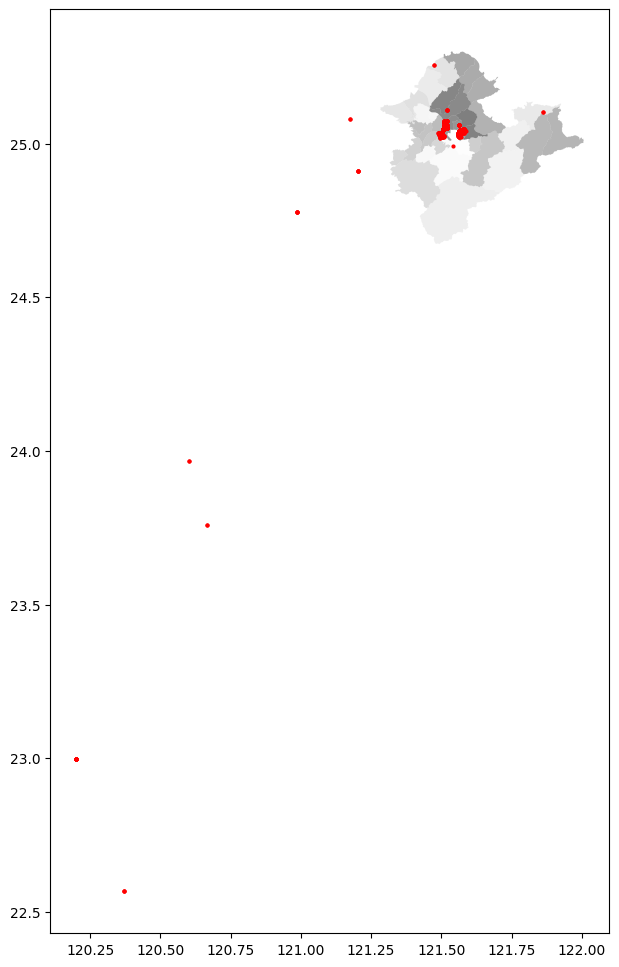

In [78]:
# display
fig, ax = plt.subplots(figsize=(12, 12))
Big_Taipei_data.plot(cmap='Greys', ax=ax, alpha=.5)
Youbike_sjoin.plot(color = 'red', ax=ax, markersize = 4)